Importing necessary libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\Datatrained Projects\\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
#Check the data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#Describing the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
#Check the shape of dataset - Columns and Rows
df.shape

(1599, 12)

<AxesSubplot:>

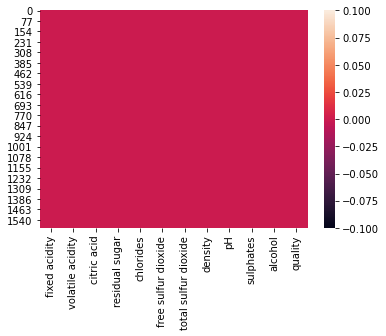

In [12]:
#Check the null value
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

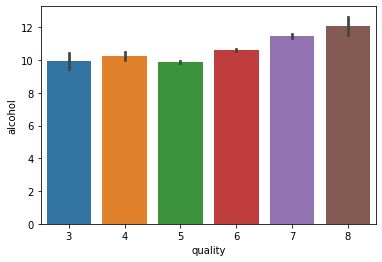

In [13]:
#Check with barplot - Quality impact
sns.barplot(x="quality",y="alcohol",data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

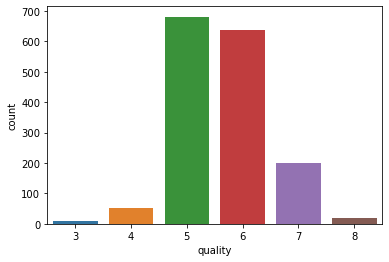

In [14]:
#Quality Visualization
sns.countplot(x="quality",data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

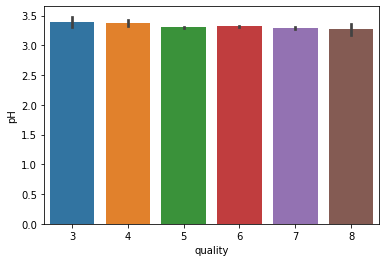

In [19]:
#PH Impact on quality
sns.barplot(x="quality",y="pH",data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

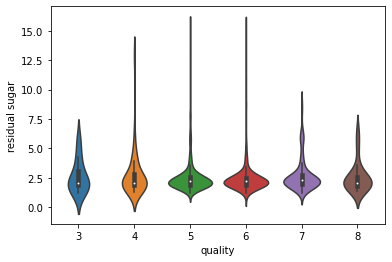

In [16]:
sns.violinplot(x="quality",y="residual sugar",data=df)

<AxesSubplot:>

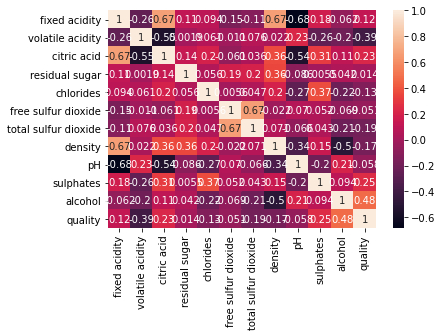

In [20]:
#Correlation of columns with heatmap
sns.heatmap(df.corr(),annot=True)

In [21]:
#Drop the volatile acidity column due to highly -ve correlation
df.drop('volatile acidity',axis=1,inplace=True)

<AxesSubplot:>

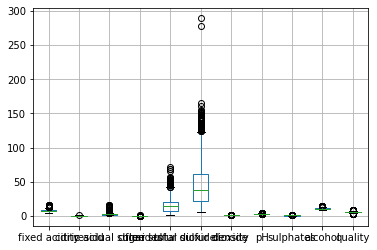

In [22]:
#Validate the Outlier with boxplot
df.boxplot()

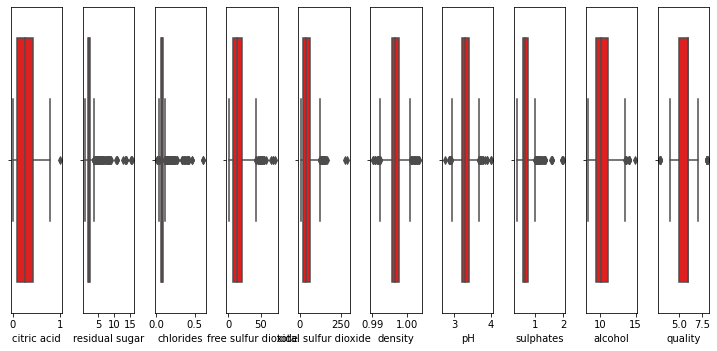

In [23]:
#Visualizing each column individually with sns.subplot for getting more clearance about the outlier
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,4*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Red',orient='v')
    plt.tight_layout()

In [25]:
#Remove the outlier with zscore 
z=np.abs(zscore(df))
print(df.shape)
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(1599, 11)
(1458, 11)


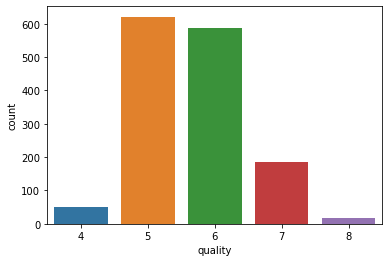

In [26]:
#Quality check after removed the outliers
sns.countplot(x="quality",data=df_new)
plt.show()

In [28]:
#Converting target variable into binary classification problem 
df_new['quality']=df_new['quality'].replace({5:"Bad",6:"Bad",3:"Bad",4:"Bad",6.5:"good",7:"Good",8:"Good"})
df.head(20)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<AxesSubplot:xlabel='quality', ylabel='count'>

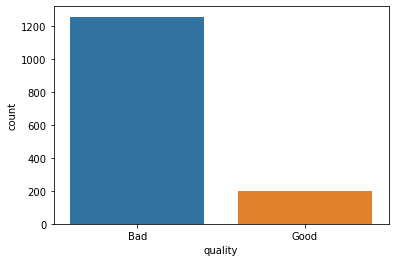

In [29]:
sns.countplot(x='quality',data=df_new)

In [30]:
#Divide the dataset into input and output
df_x=df_new.drop(columns=["quality"])
y=df_new[["quality"]]

In [31]:
#Loop for skew data
for index in df_x.skew().index:
    if df_x.skew().loc[index] >0.55:
        df_x[index]=np.cbrt(df_x[index])

In [33]:
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


In [48]:

def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [49]:
def kfold(clf,x,y,):
    print("Mean roc auc score for",clf,cross_val_score(clf,x,y,cv=5,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for",clf,cross_val_score(clf,x,y,cv=5,scoring="roc_auc").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="roc_auc"))

In [50]:

dc=DecisionTreeClassifier()
max_aucroc_score(dc,x,y)

auc roc score corresponding to  42  is  0.7168650793650793
auc roc score corresponding to  43  is  0.7932539682539682
auc roc score corresponding to  44  is  0.7543650793650795
auc roc score corresponding to  45  is  0.6767857142857143
auc roc score corresponding to  46  is  0.7623015873015874
auc roc score corresponding to  47  is  0.7103174603174603
auc roc score corresponding to  48  is  0.763690476190476
auc roc score corresponding to  49  is  0.7571428571428571
auc roc score corresponding to  50  is  0.6958333333333333
auc roc score corresponding to  51  is  0.7734126984126984
auc roc score corresponding to  52  is  0.7432539682539683
auc roc score corresponding to  53  is  0.7248015873015873
auc roc score corresponding to  54  is  0.7373015873015873
auc roc score corresponding to  55  is  0.7228174603174604
auc roc score corresponding to  56  is  0.7378968253968253
auc roc score corresponding to  57  is  0.7392857142857143
auc roc score corresponding to  58  is  0.736706349206349

92

In [51]:
kfold(dc,x,y)

Mean roc auc score for DecisionTreeClassifier() 0.6601356517406949
standard deviation in roc auc score for DecisionTreeClassifier() 0.058267881871257046
[0.55376984 0.72063492 0.69808571 0.6623506  0.62918327]


In [52]:

kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [53]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.6045634920634921
auc roc score corresponding to  43  is  0.6275793650793651
auc roc score corresponding to  44  is  0.6315476190476191
auc roc score corresponding to  45  is  0.5696428571428572
auc roc score corresponding to  46  is  0.5920634920634921
auc roc score corresponding to  47  is  0.625595238095238
auc roc score corresponding to  48  is  0.629563492063492
auc roc score corresponding to  49  is  0.6565476190476192
auc roc score corresponding to  50  is  0.588095238095238
auc roc score corresponding to  51  is  0.550595238095238
auc roc score corresponding to  52  is  0.6486111111111111
auc roc score corresponding to  53  is  0.6105158730158731
auc roc score corresponding to  54  is  0.5525793650793651
auc roc score corresponding to  55  is  0.611111111111111
auc roc score corresponding to  56  is  0.613095238095238
auc roc score corresponding to  57  is  0.640079365079365
auc roc score corresponding to  58  is  0.6051587301587301
auc 

75

In [54]:
kfold(kc,x,y)

Mean roc auc score for KNeighborsClassifier(n_neighbors=29) 0.8381821089625239
standard deviation in roc auc score for KNeighborsClassifier(n_neighbors=29) 0.023252855720876445
[0.86185516 0.84856151 0.85992615 0.81200199 0.80856574]


In [55]:
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators":[10,50,100,150,200,300,350,400,450,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 200}

In [56]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7341269841269841
auc roc score corresponding to  43  is  0.7440476190476191
auc roc score corresponding to  44  is  0.7315476190476191
auc roc score corresponding to  45  is  0.6716269841269841
auc roc score corresponding to  46  is  0.790079365079365
auc roc score corresponding to  47  is  0.7275793650793652
auc roc score corresponding to  48  is  0.715079365079365
auc roc score corresponding to  49  is  0.790079365079365
auc roc score corresponding to  50  is  0.6670634920634921
auc roc score corresponding to  51  is  0.740079365079365
auc roc score corresponding to  52  is  0.7315476190476191
auc roc score corresponding to  53  is  0.765079365079365
auc roc score corresponding to  54  is  0.7025793650793651
auc roc score corresponding to  55  is  0.736111111111111
auc roc score corresponding to  56  is  0.809126984126984
auc roc score corresponding to  57  is  0.7775793650793651
auc roc score corresponding to  58  is  0.763095238095238
auc r

92

In [57]:
kfold(rf_clf,x,y)

Mean roc auc score for RandomForestClassifier(n_estimators=500) 0.8606771606951982
standard deviation in roc auc score for RandomForestClassifier(n_estimators=500) 0.02682430806615382
[0.89786706 0.8391369  0.89743465 0.83286853 0.85901394]


In [59]:
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [60]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7906746031746033
auc roc score corresponding to  43  is  0.7571428571428571
auc roc score corresponding to  44  is  0.7525793650793651
auc roc score corresponding to  45  is  0.6926587301587301
auc roc score corresponding to  46  is  0.7992063492063491
auc roc score corresponding to  47  is  0.7577380952380952
auc roc score corresponding to  48  is  0.7321428571428571
auc roc score corresponding to  49  is  0.8196428571428572
auc roc score corresponding to  50  is  0.6946428571428572
auc roc score corresponding to  51  is  0.7321428571428571
auc roc score corresponding to  52  is  0.8031746031746031
auc roc score corresponding to  53  is  0.7986111111111112
auc roc score corresponding to  54  is  0.700595238095238
auc roc score corresponding to  55  is  0.7571428571428571
auc roc score corresponding to  56  is  0.788690476190476
auc roc score corresponding to  57  is  0.7676587301587301
auc roc score corresponding to  58  is  0.763095238095238


68

In [61]:
kfold(gb_clf,x,y)

Mean roc auc score for GradientBoostingClassifier(n_estimators=500) 0.8439366633350455
standard deviation in roc auc score for GradientBoostingClassifier(n_estimators=500) 0.03424476905624375
[0.87956349 0.79156746 0.88144981 0.81733068 0.84671315]


In [62]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [63]:
svc=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.5545634920634921
auc roc score corresponding to  43  is  0.5
auc roc score corresponding to  44  is  0.5
auc roc score corresponding to  45  is  0.6236111111111111
auc roc score corresponding to  46  is  0.5
auc roc score corresponding to  47  is  0.55
auc roc score corresponding to  48  is  0.5480158730158731
auc roc score corresponding to  49  is  0.5
auc roc score corresponding to  50  is  0.5920634920634921
auc roc score corresponding to  51  is  0.567063492063492
auc roc score corresponding to  52  is  0.575
auc roc score corresponding to  53  is  0.498015873015873
auc roc score corresponding to  54  is  0.5210317460317461
auc roc score corresponding to  55  is  0.575595238095238
auc roc score corresponding to  56  is  0.6125
auc roc score corresponding to  57  is  0.5
auc roc score corresponding to  58  is  0.5375
auc roc score corresponding to  59  is  0.5545634920634921
auc roc score corresponding to  60  is  0.5
auc roc score correspon

99

In [64]:
kfold(svc,x,y)

Mean roc auc score for SVC(C=0.1, kernel='linear') 0.8881509328539501
standard deviation in roc auc score for SVC(C=0.1, kernel='linear') 0.02467616332933558
[0.9155754  0.8781746  0.91662618 0.85239044 0.87798805]


Random Forest Classifier performs the best. We will choose that model

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 92,test_size=0.20,stratify=y)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [68]:
#Model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[240  12]
 [  9  31]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       252
           1       0.72      0.78      0.75        40

    accuracy                           0.93       292
   macro avg       0.84      0.86      0.85       292
weighted avg       0.93      0.93      0.93       292



In [69]:
import joblib 

In [70]:
joblib.dump(svc, 'winequalityprediction.pkl')

['winequalityprediction.pkl']